# The EDA approach

# Defining Descriptive Statistics for Numeric Data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

### derive a Numpy nparray and pandas df from Scikit-learn datasets

In [2]:
import pandas as pd
import numpy as np
# checking the version of your pandas and numpy
print(F'Your pandas version is: {pd.__version__}')
print(F'Your numpy version is: {np.__version__}')
# convert iris datasets (bunch) into nparray
iris_nparray = iris.data
# convert iris nparray into pandas DataFrame
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
# add group variable/feature and its observation using 
# iris.target_names
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in 
                                     iris.target], dtype='category')
iris_dataframe.head()

Your pandas version is: 1.0.4
Your numpy version is: 1.18.1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Measuring central tendency

### calculate mean and median with pandas

In [3]:
# numeric_only para. used to calculate mean using only numeric value
iris_mean = iris_dataframe.mean(numeric_only=True)
iris_median = iris_dataframe.median(numeric_only=True)
print(iris_mean)
print(iris_median)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


## Measuring variance and range

### calculate standard deviation and range with pandas

In [4]:
iris_std = iris_dataframe.std()
iris_range = (iris_dataframe.max(numeric_only=True) -
              iris_dataframe.min(numeric_only=True))
print(iris_std)
print(iris_range)

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


## Working with percentiles

### calculate percentiles with pandas

In [5]:
iris_percentiles = iris_dataframe.quantile([.0, .25, .50, .75, 1.])
print(iris_percentiles)

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3               2.0               1.00               0.1
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8
1.00                7.9               4.4               6.90               2.5


## Defining measures of normality

### calculate the skewness and test it with Scipy

In [6]:
# importing the required func
from scipy.stats import skew, skewtest
# assign petal lenght feature to variable
variable = iris_dataframe['petal length (cm)']
# calculate the skewness
s = skew(variable)
# apply the test
zscore, pvalue = skewtest(variable)
print(f'Skewness {s:.3f} z-score {zscore:.3f} p-value {pvalue:.3f}')
# the result shows that the distribution is silghtly skewed to the left
# and it is still usable because p-value > 0.05

Skewness -0.272 z-score -1.400 p-value 0.162


In [7]:
# importing the required func
from scipy.stats import kurtosis, kurtosistest
variable = iris_dataframe['petal length (cm)']
# calculate the kurtosis
k = kurtosis(variable)
# apply the test
zscore, pvalue = kurtosistest(variable)
print(f'Kurtosis {k:.3f} z-score {zscore:.3f} p-value {pvalue:.3f}')
# the result shows that the distribution is too flat to be ball shaped 
# it's unusable as a normal distribution data since p-value <= 0.05

Kurtosis -1.396 z-score -14.823 p-value 0.000


# Counting for Categorical Data

In [8]:
# creating the list of percentiles that will be used
pcts = [0, .25, .50, .75, 1]
# creating the list of names that will be used as the bins name
labels = ['tiny', 'small', 'average', 'big']
# categorizing the data with qcut()
iris_binned = pd.concat([
    # first para. is the observation you want to be grouped
    # 2nd para. is the percentiles you want to cut with
    # labels para. is the name to each bin produced
    # precision para. still uncclear
    pd.qcut(iris_dataframe.iloc[:,0], pcts, labels=labels, precision=1),
    pd.qcut(iris_dataframe.iloc[:,1], pcts, labels=labels, precision=1),
    pd.qcut(iris_dataframe.iloc[:,2], pcts, labels=labels, precision=1),
    pd.qcut(iris_dataframe.iloc[:,3], pcts, labels=labels, precision=1)],
    # join para. is the way you handle indexes in other axis(es)
    # axis para. is which axis you are working on
    join='inner', axis = 1)
iris_binned.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,tiny,big,tiny,tiny
1,tiny,small,tiny,tiny
2,tiny,average,tiny,tiny
3,tiny,average,tiny,tiny
4,tiny,big,tiny,tiny


## Understanding frequencies

### obtaining frequencies from a categorical data with pandas

In [9]:
# using value_counts(), obtain the frequencies of categorical data
# in a certain variable/column
print(iris_dataframe['group'].value_counts())

virginica     50
versicolor    50
setosa        50
Name: group, dtype: int64


In [10]:
# using previous binned dataframe to find its frequencies
print(iris_binned['petal length (cm)'].value_counts())

tiny       44
average    41
big        34
small      31
Name: petal length (cm), dtype: int64


In [11]:
# a brief summary of binned iris dataframe
print(iris_binned.describe())

       sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
count                150              150               150              150
unique                 4                4                 4                4
top                 tiny             tiny              tiny             tiny
freq                  41               47                44               41


## Creating contingency tables

### using pd.crosstab to match various categorical frequency distribution

In [12]:
# matching the group variable from the original dataframe and 
# petal length (cm) variable from the binned dataframe
print(pd.crosstab(iris_dataframe['group'],
                  iris_binned['petal length (cm)']))

petal length (cm)  tiny  small  average  big
group                                       
setosa               44      6        0    0
versicolor            0     25       25    0
virginica             0      0       16   34


# Creating Applied Visualization for EDA

## Inspecting boxplots

### creating boxplot of every variables in a DF

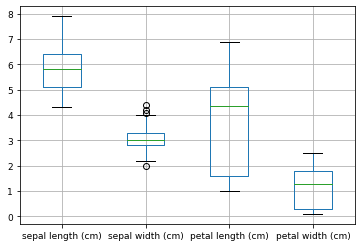

In [13]:
# using boxplot() from pandas
boxplots = iris_dataframe.boxplot(fontsize=9)

## creating a boxplot of a variable by a group

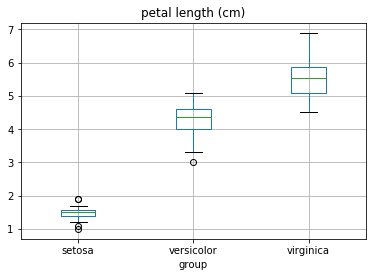

In [14]:
import matplotlib.pyplot as plt
# column para. used to determine which variable used as y-axis
# by para. used to determine which variable used as x-axos
boxplot = iris_dataframe.boxplot(column='petal length (cm)',
                                 by='group', fontsize=10)
# used to conceal the unnecessary title
plt.suptitle("")
plt.show()

## Performing t-test after boxplots

### showing var. of each group

In [15]:
from scipy.stats import ttest_ind
# creating a series of boolean value according to the group variable 
group0 = iris_dataframe['group'] == 'setosa'
group1 = iris_dataframe['group'] == 'versicolor'
group2 = iris_dataframe['group'] == 'virginica'
# assign petal length (cm) values to a variable
variable = iris_dataframe['petal length (cm)']
# print the variance of each groups' variable values
print(f'var0 {variable[group0].var():.3f}')
print(f'var1 {variable[group1].var():.3f} var2 {variable[group1].var():.3f} ')

var0 0.030
var1 0.221 var2 0.221 


### performing t-test using scipy.stats

In [16]:
# using petal width variable
variable = iris_dataframe['sepal width (cm)']
# 1st and 2nd para. is the groups you want to test
# axis para. is which axis you want to worked with
# equal_var para. is to choose which type of test you want to perform
# according whether the variance is equal or nah
t, pvalue = ttest_ind(variable[group1], variable[group2],
                      axis=0, equal_var=False)

print(f't statistic {t:.3f} p-value {pvalue:.3f}')

t statistic -3.206 p-value 0.002


### performing ANOVA test using scipy.stats

In [17]:
from scipy.stats import f_oneway
variable = iris_dataframe['sepal width (cm)']
f, pvalue = f_oneway(variable[group0],
                     variable[group1],
                     variable[group2])

print(f'One-way ANOVA F-value {f:.3f} p-value {pvalue:.3f}')

One-way ANOVA F-value 49.160 p-value 0.000


## Observing parallel coordinates

### using parallel coordinates with pandas.plotting

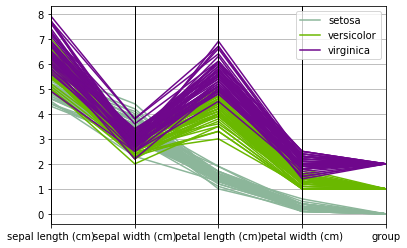

In [18]:
from pandas.plotting import parallel_coordinates
# assign the grouping classification to a new variable/feature
iris_dataframe['group'] = iris.target
# create a new variable that contains the name group classification
iris_dataframe['labels'] = [iris.target_names[k]
                            for k in iris_dataframe['group']]
# 1st para. is the dataframe you want to plot
# 2nd para. is the variable you wanted to be the differentioator
pll = parallel_coordinates(iris_dataframe, 'labels') 

## Graphing distributions

### Create a curve using pandas

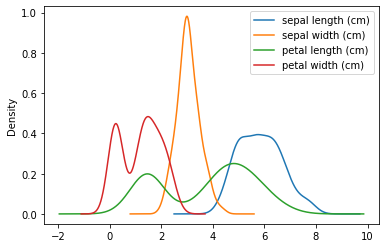

In [19]:
# creating a variable that consist of the table's variable name
cols = iris_dataframe.columns[:4]
# plotting the distirbution of each variable
# kind para. determines which type of plot you want to plot
densityplot = iris_dataframe[cols].plot(kind='density')

### plotting histogram using pandas

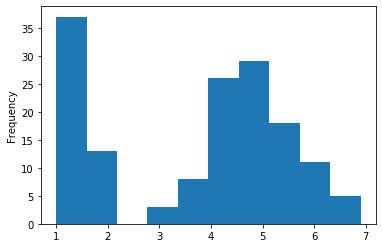

In [20]:
variable = iris_dataframe['petal length (cm)']
# plotting the histogram of petal length (cm) variable
single_distribution = variable.plot(kind='hist')

## Plotting scatterplots

### plotting scatterplot using pandas

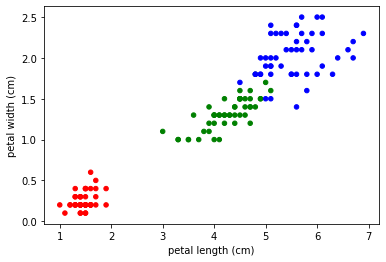

In [21]:
# create a dict consist of int as the key and colors as its values
palette = {0: 'red', 1: 'green', 2: 'blue'}
# create a list of colors that corresponded to the variable group 
colors = [palette[i] for i in iris_dataframe['group']]
# plot the scatterplot
# x para. is the x-axis
# y para. is the y-axis
# c para. is the color of each point
simple_scatterplot = iris_dataframe.plot(
                kind='scatter', x='petal length (cm)', 
                y='petal width (cm)', c=colors)

### creating a matrix of scatterplot with pandas

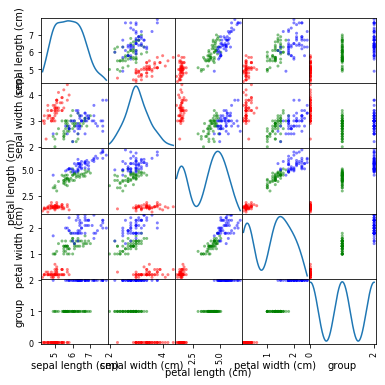

In [22]:
from pandas.plotting import scatter_matrix
palette = {0: 'red', 1: 'green', 2: 'blue'} 
colors = [palette[i] for i in iris_dataframe['group']]
# creating the matrix of scatterplots
# 1st para. is the dataframe you want to be used
# figsize para. determines the size of the figure produced
# diagonal para. shows either the density curve or histogram of 
# the respectable variable
matrix_of_scatterplots = scatter_matrix(
    iris_dataframe, figsize=(6, 6),
    c=colors, diagonal='kde')


# Understanding Correlation 

## Using covariance and correlation

### creating covariance matrix with pandas

In [23]:
# using cov() to compute covariance
iris_dataframe.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
group,0.530872,-0.152349,1.372483,0.597315,0.671141


### examine correlation matrix with pandas

In [24]:
# using corr() to compute correlation
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
group,0.782561,-0.426658,0.949035,0.956547,1.000000


### compute covariance and correlation matrices using NumPy

In [25]:
# compute covariance and correlation
# rowvar para. determines which row will be the variable
cov_matrix = np.cov(iris_nparray, rowvar=0)
corr_matrix = np.corrcoef(iris_nparray, rowvar=0)
print(cov_matrix)
print(corr_matrix)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


## Using nonparametric correlation

### compute spearman corr (nonparametric corr) with scipy

In [26]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
# spearmanr() and pearsonr() will return 2 values
# 1st is the correlation coefficient
# 2nd is the p-value
# spearman corr usually use rho to denote its correlation
# while peason use r
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print(f'Pearson r {r_coef:.3f} | Spearman rho {rho_coef:.3f}')
# the result shows that both using pearson and spearman corr
# the correlation between sepal length and width is weak

Pearson r -0.118 | Spearman rho -0.167


## Considering the chi-square test for tables

### compute chi-square statistic using SciPy

In [36]:
from scipy.stats import chi2_contingency
# creating crosstab between feature group and binned petal length
table = pd.crosstab(iris_dataframe['group'], 
                    iris_binned['petal length (cm)'])
print(table.values)
# perform chi-square test and it returns
# 1st chi-square statistic
# 2nd p_value
# 3rd degree of freedom
# 4th expected frequencies 
chi2, p, dof, expected = chi2_contingency(table.values)
print(f'Chi-square {chi2:.2f} p-value {p:.3f}')

[[44  6  0  0]
 [ 0 25 25  0]
 [ 0  0 16 34]]
Chi-square 212.43 p-value 0.000


# Modifying Data Distributions

## Using different statistical distributions

## Creating a Z-score standardization

### perform Z-score standardization using sklearn

In [43]:
from sklearn.preprocessing import scale
# assign a feature to a variable as a nparray
variable = iris_dataframe['sepal width (cm)']
# scale the variable with Z-score standardization
stand_sepal_width = scale(variable)

## Transforming other notable distributions

In [55]:
from scipy.stats.stats import pearsonr
transformations = {'x': lambda x: x,
                   '1/x': lambda x: 1/x,
                   'x**2': lambda x: x**2,
                   'x**3': lambda x: x**3, 
                   'log(x)': lambda x: np.log(x),
                   'sqrt(x)': lambda x: np.sqrt(x),
                   'exp(x)': lambda x: np.exp(x), 
                   'log(1/x)': lambda x: np.log(1/x)}
a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
for transformation in transformations:
    b_transformed = transformations[transformation](b)
    r_coef, p_value = pearsonr(a, b_transformed)
    print(f'Transformation: {transformation} \t Pearson\'s r: {r_coef:.3f}')

Transformation: x 	 Pearson's r: -0.118
Transformation: 1/x 	 Pearson's r: 0.080
Transformation: x**2 	 Pearson's r: -0.131
Transformation: x**3 	 Pearson's r: -0.140
Transformation: log(x) 	 Pearson's r: -0.100
Transformation: sqrt(x) 	 Pearson's r: -0.109
Transformation: exp(x) 	 Pearson's r: -0.142
Transformation: log(1/x) 	 Pearson's r: 0.100
